In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score

In [5]:
df=pd.read_csv('advertising.csv')

In [6]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [8]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [11]:
df.shape

(200, 4)

In [12]:
corr=df.corr()

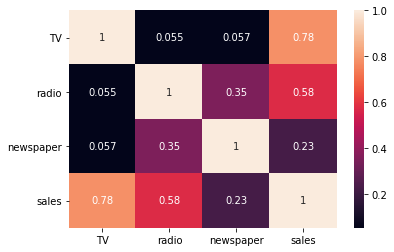

In [13]:
sns.heatmap(corr,annot=True)
plt.show()

In [14]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [15]:
s = df['TV']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers = dict(s[(s < iqr_lower) | (s > iqr_upper)])

In [16]:
print(outliers)

{}


In [17]:
s = df['radio']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers1 = dict(s[(s < iqr_lower) | (s > iqr_upper)])

In [18]:
print(outliers1)

{}


In [19]:
s = df['newspaper']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers2 = dict(s[(s < iqr_lower) | (s > iqr_upper)])

In [20]:
print(outliers2)

{16: 114.0, 101: 100.9}


In [21]:
a=list(outliers2.keys())

In [22]:
print(a)

[16, 101]


In [23]:
df.drop(a,inplace=True)

In [24]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [25]:
df.describe()

,TV,radio,newspaper,sales
count,198.000000,198.000000,198.000000,198.000000
mean,146.688384,23.130808,29.777273,13.980808
std,85.443221,14.862111,20.446303,5.196097
min,0.700000,0.000000,0.300000,1.600000
25%,74.800000,9.925000,12.650000,10.325000
50%,149.750000,22.400000,25.600000,12.900000
75%,218.475000,36.325000,44.050000,17.375000
max,293.600000,49.600000,89.400000,27.000000


In [26]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [27]:
X=df.drop('sales',axis=1)
Y=df['sales']

In [28]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [29]:
Y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [30]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [31]:
ss=StandardScaler()

In [32]:
X_train_ss=ss.fit_transform(X_train)
X_test_ss=ss.transform(X_test)

In [33]:
def create_model(model):
    model.fit(X_train_ss,Y_train)
    Y_pred=model.predict(X_test_ss)
    print(r2_score(Y_test,Y_pred))

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lr=LinearRegression()

In [36]:
create_model(lr)

0.9057939794969587


In [37]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.svm import SVR 
from sklearn.svm import LinearSVR

In [38]:
dt=DecisionTreeRegressor()

In [39]:
create_model(dt)

0.9583753505524191


In [40]:
svm1=LinearSVR()
svm2=SVR(kernel='poly')
svm3=SVR(kernel='rbf')

In [41]:
create_model(svm1)

0.9192289580035753


In [42]:
create_model(svm2)

0.7740838921256381


In [43]:
create_model(svm3)

0.9107023240285773


In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

In [45]:
rfc=RandomForestRegressor()

In [46]:
create_model(rfc)

0.9766862675460227


In [47]:
bc1=BaggingRegressor(RandomForestRegressor(),random_state=1)
bc2=BaggingRegressor(RandomForestRegressor(),random_state=1,bootstrap=False)

In [48]:
create_model(bc1)

0.9701354200495129


In [49]:
create_model(bc2)

0.9800417347590973


In [50]:
from sklearn.ensemble import AdaBoostRegressor 
from sklearn.ensemble import GradientBoostingRegressor 
from xgboost import XGBRegressor

In [51]:
ada=AdaBoostRegressor()
gbr=GradientBoostingRegressor() 
xgr=XGBRegressor()

In [52]:
create_model(ada)

0.9494141369013298


In [53]:
create_model(gbr)

0.9860844765929752


In [54]:
create_model(xgr)

0.966166031737785
